<a href="https://colab.research.google.com/github/kavyaagarwal178/birds_classification/blob/main/birds_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the drive**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


**Displaying the contents in the drive**

In [ ]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'Bird Speciees Dataset'   plant_disease.h5	    plant_model_weights.h5
 Certificates		  Plant_images_pianalytix   test_data.csv
'Colab Notebooks'	  plant_model.json	    train_data.csv


**Import the libraries**

In [ ]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

**Displaying the images**

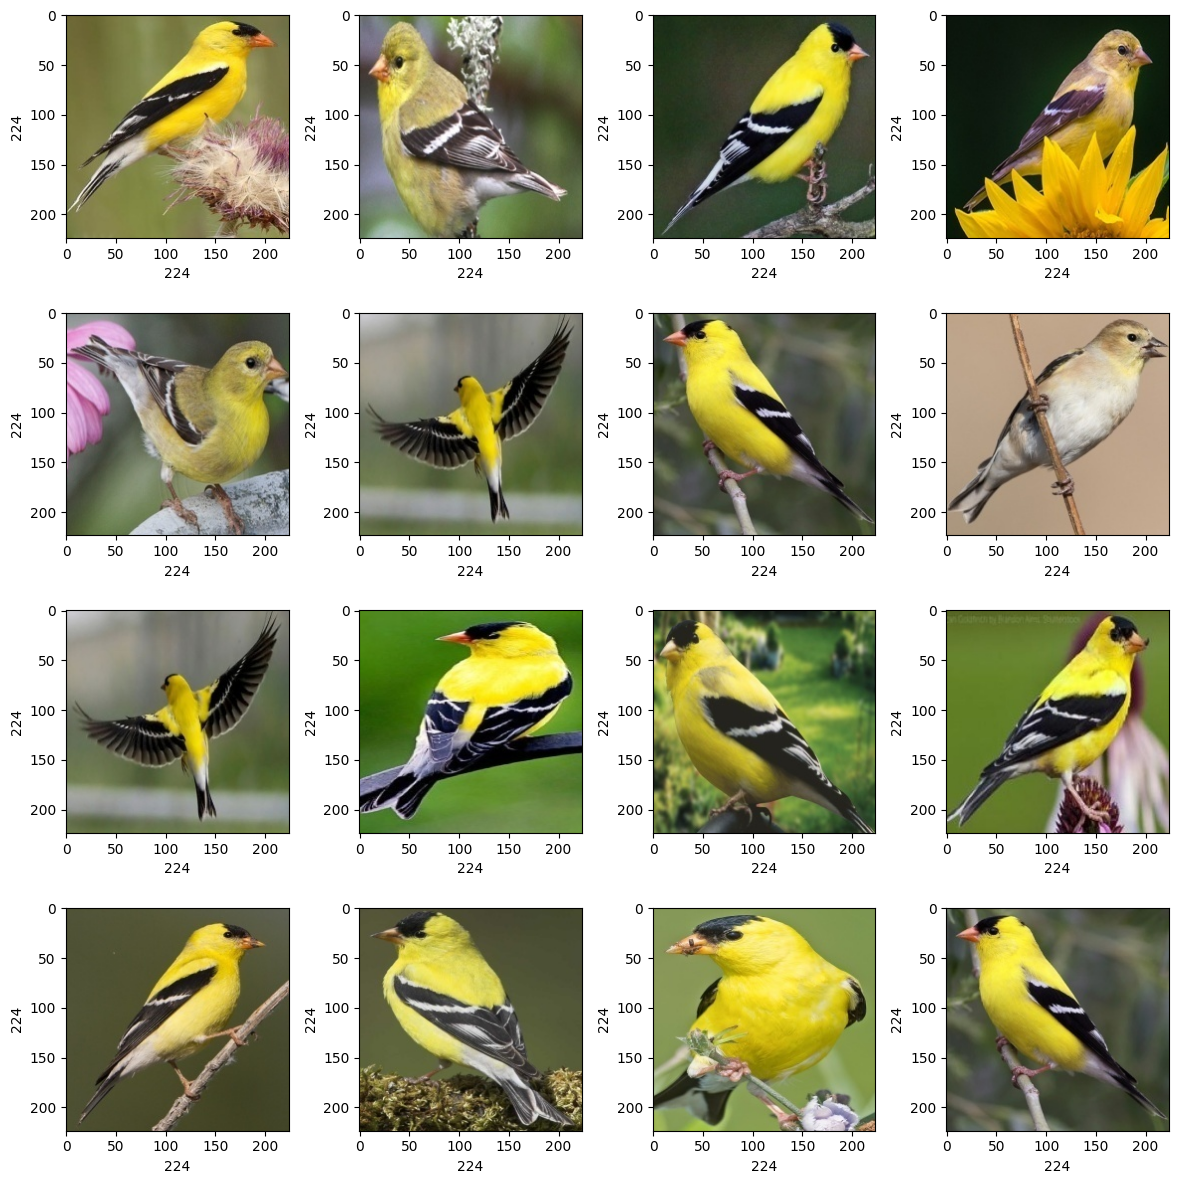

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

 **Setting path and creating empty list**

In [ ]:
dir = "/content/drive/My Drive/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

**Reading and converting image to numpy array**

In [ ]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

**Visualize the number of classes count**

In [ ]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

**Storing number of classes**

In [ ]:
num_classes = len(label_counts)
num_classes

6

**Checking input image shape**

In [ ]:
image_list[0].shape

(224, 224, 3)

 **Checking labels shape**

In [ ]:
label_list = np.array(label_list)
label_list.shape

(811,)

**Splitting dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

**Normalize and reshape data**

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

**Label binarizing**

In [ ]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


**Splitting the training data set into training and validation data sets**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

**Building model architecture**

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

**Compiling model**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

**Training the model**

In [ ]:

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 8s 1s/step - loss: 1.8125 - accuracy: 0.1641 - val_loss: 1.7863 - val_accuracy: 0.1462
Epoch 2/50
5/5 [==============================] - 7s 1s/step - loss: 1.7413 - accuracy: 0.2278 - val_loss: 1.7059 - val_accuracy: 0.2077
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 1.7006 - accuracy: 0.2413 - val_loss: 1.6658 - val_accuracy: 0.2231
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 1.6308 - accuracy: 0.3340 - val_loss: 1.6663 - val_accuracy: 0.4000
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 1.5748 - accuracy: 0.5000 - val_loss: 1.5283 - val_accuracy: 0.5615
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 1.4666 - accuracy: 0.6448 - val_loss: 1.4878 - val_accuracy: 0.6077
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 1.3842 - accuracy: 0.6429 - val_loss: 1.3781 - val_accuracy: 0.5154
Epoch 8/50
5/5 [=========================

**Saving model**

In [ ]:
model.save("/content/drive/My Drive/bird_species.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Plot the training history**

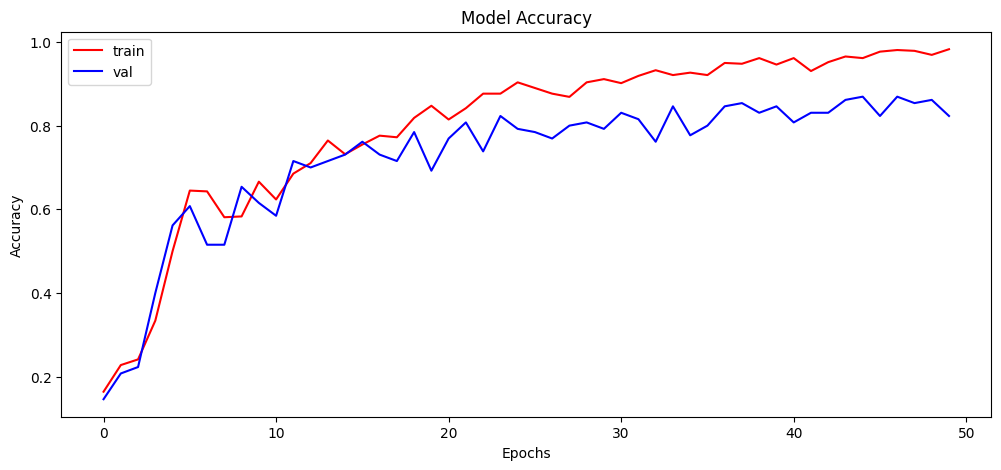

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

**Plot the loss history**

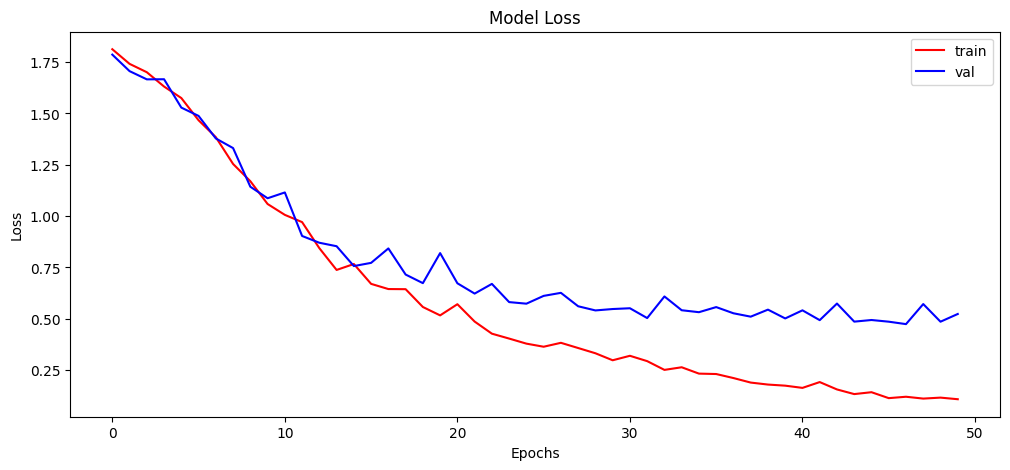

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

**Calculating test accuracy**

In [21]:

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 1s 124ms/step - loss: 0.6426 - accuracy: 0.7975
Test Accuracy: 79.75460290908813


**Storing predictions**

In [22]:
y_pred = model.predict(x_test)

6/6 [==============================] - 1s 119ms/step


**Plotting image to compare**

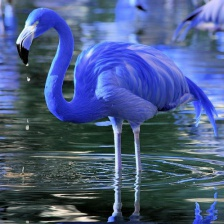

In [23]:
img = array_to_img(x_test[5])
img

In [24]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  FLAMINGO
Predicted :  FLAMINGO
